In [2]:
import os
import pandas as pd
# import IPython.display as ipd
# import librosa
# import librosa.display
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import copy
import glob
import json

In [3]:
notes = ['C','Db','D','Eb','E','F','Gb','G','Ab','A','Bb','B']

semitons = list(range(0,12))
semitons.extend(list(range(0,12)))
semitons

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Preparing the data:

In [4]:
data = pd.read_csv('../corpus/generated_chords/chromas.csv')
data.set_index('Unnamed: 0', inplace=True)
data.head()

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,true
Unnamed: 0,,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,10654.647461,3569.312256,Adim
Ddim_york-samai_Flute.ogg,4375.995605,2476.719482,19825.443359,6544.238281,2427.818115,16179.813477,5883.677246,2274.637939,13487.067383,4407.742676,3799.718750,18750.318359,Ddim
Ddim_agsag-samai_Flute.ogg,4757.529785,4617.486816,40611.800781,10245.474609,2260.584961,15512.979492,9978.814453,2673.318848,13023.239258,6278.671387,3372.433838,14634.633789,Ddim
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,40828.687500,9821.972656,Adim
Cdim_agogo-samba_Flute.ogg,74844.898438,21082.603516,5456.087891,34039.152344,21792.017578,7089.446777,34986.039062,21720.095703,11436.190430,45434.156250,13306.848633,8570.800781,Cdim


In [5]:
def fix_meio_dim(chord):
    if 'meio' in chord:
        return chord + '_dim'
    else:
        return chord
    
data['true_fixed'] = data['true'].map(fix_meio_dim)
data.head()

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,true,true_fixed
Unnamed: 0,,,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,10654.647461,3569.312256,Adim,Adim
Ddim_york-samai_Flute.ogg,4375.995605,2476.719482,19825.443359,6544.238281,2427.818115,16179.813477,5883.677246,2274.637939,13487.067383,4407.742676,3799.718750,18750.318359,Ddim,Ddim
Ddim_agsag-samai_Flute.ogg,4757.529785,4617.486816,40611.800781,10245.474609,2260.584961,15512.979492,9978.814453,2673.318848,13023.239258,6278.671387,3372.433838,14634.633789,Ddim,Ddim
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,40828.687500,9821.972656,Adim,Adim
Cdim_agogo-samba_Flute.ogg,74844.898438,21082.603516,5456.087891,34039.152344,21792.017578,7089.446777,34986.039062,21720.095703,11436.190430,45434.156250,13306.848633,8570.800781,Cdim,Cdim


Carregando os chromas perfeitos:

In [6]:
# Opening JSON file
with open('perfect_chromas.json') as json_file:
    perfect_chromas = json.load(json_file)
    
# perfect_chromas

In [7]:
vec_Cmaj7 = perfect_chromas['Cmaj7']
vec_Cmaj7 = np.array(vec_Cmaj7)
vec_Cmaj7

array([1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])

In [9]:
dists = {}
for key, value in perfect_chromas.items():
#     chroma_norm = vec_Cmaj7.T/chroma.max()
    value = np.array(value)
    dist = np.linalg.norm(value - vec_Cmaj7)
    print('Acorde:', key, '|', 'Distância:', dist)
    dists[key] = dist
    print('--------------------------------')

Acorde: Cmaj7 | Distância: 0.0
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.0
--------------------------------
Acorde: Fmaj7 | Distância: 2.0
--------------------------------
Acorde: Gbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Gmaj7 | Distância: 2.0
--------------------------------
Acorde: Abmaj7 | Distância: 2.0
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Db7 | Distância: 2.449489742783178
-------

A representação de um acorde será determinada a partir da distância dele ao Cmaj7. Abaixo, calculamos essas distâncias e ordenamos os acordes de acordo com elas.

In [10]:
df_chords_codes = pd.DataFrame(data=dists.values(), index=dists.keys()).sort_values(0, ascending=True)

df_chords_codes.rename(columns={0:'distance'}, 
                       inplace=True)

df_chords_codes['target'] = list(range(len(df_chords_codes)))
df_chords_codes

,distance,target
Cmaj7,0.000000,0
Emin7,1.414214,1
Amin7,1.414214,2
Dbmeio_dim,1.414214,3
C7,1.414214,4
Dbdim,2.000000,5
Edim,2.000000,6
Dbmin7,2.000000,7
Cmin7,2.000000,8
Gdim,2.000000,9


In [53]:
# df_chords_codes.reset_index()

In [11]:
data.head()

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,true,true_fixed
Unnamed: 0,,,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,10654.647461,3569.312256,Adim,Adim
Ddim_york-samai_Flute.ogg,4375.995605,2476.719482,19825.443359,6544.238281,2427.818115,16179.813477,5883.677246,2274.637939,13487.067383,4407.742676,3799.718750,18750.318359,Ddim,Ddim
Ddim_agsag-samai_Flute.ogg,4757.529785,4617.486816,40611.800781,10245.474609,2260.584961,15512.979492,9978.814453,2673.318848,13023.239258,6278.671387,3372.433838,14634.633789,Ddim,Ddim
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,40828.687500,9821.972656,Adim,Adim
Cdim_agogo-samba_Flute.ogg,74844.898438,21082.603516,5456.087891,34039.152344,21792.017578,7089.446777,34986.039062,21720.095703,11436.190430,45434.156250,13306.848633,8570.800781,Cdim,Cdim


In [12]:
df_model = data.reset_index().merge(df_chords_codes.reset_index(), 
                      left_on='true_fixed', 
                      right_on='index')

df_model.set_index('Unnamed: 0', inplace=True)

df_model.head()

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,true,true_fixed,index,distance,target
Unnamed: 0,,,,,,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,10654.647461,3569.312256,Adim,Adim,Adim,2.44949,30
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,40828.687500,9821.972656,Adim,Adim,Adim,2.44949,30
Adim_ngbaka-maibo_Flute.ogg,68037.242188,12835.152344,4870.505371,40230.593750,39330.230469,17371.283203,75865.453125,33637.277344,22151.335938,148937.390625,35372.738281,11123.214844,Adim,Adim,Adim,2.44949,30
Adim_york-samai_Flute.ogg,22348.162109,3972.228760,2144.426758,17316.121094,7306.083496,7339.908691,43593.343750,13212.253906,4215.419434,27228.595703,9719.834961,3865.388672,Adim,Adim,Adim,2.44949,30
Adim_mpre_Flute.ogg,45878.093750,8526.463867,3851.276611,31584.609375,23283.982422,11233.979492,53161.980469,22626.351562,13100.133789,89041.476562,23711.197266,7769.175293,Adim,Adim,Adim,2.44949,30


In [13]:
df_model.shape

(21420, 17)

In [14]:
# normalizando cada coluna
# dividindo pelo valor máximo de cada chroma
for note in notes:
    df_model[note + '_norm'] = df_model[note]/df_model[notes].max(axis=1)
    
df_model

,C,Db,D,Eb,E,F,Gb,G,Ab,A,...,D_norm,Eb_norm,E_norm,F_norm,Gb_norm,G_norm,Ab_norm,A_norm,Bb_norm,B_norm
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,...,0.051887,0.421232,0.236172,0.094706,0.436516,0.248160,0.146094,1.000000,0.288199,0.096547
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,...,0.049189,0.406956,0.287159,0.130650,0.597580,0.202693,0.140847,1.000000,0.277790,0.066827
Adim_ngbaka-maibo_Flute.ogg,68037.242188,12835.152344,4870.505371,40230.593750,39330.230469,17371.283203,75865.453125,33637.277344,22151.335938,148937.390625,...,0.032702,0.270117,0.264072,0.116635,0.509378,0.225848,0.148729,1.000000,0.237501,0.074684
Adim_york-samai_Flute.ogg,22348.162109,3972.228760,2144.426758,17316.121094,7306.083496,7339.908691,43593.343750,13212.253906,4215.419434,27228.595703,...,0.049192,0.397219,0.167596,0.168372,1.000000,0.303080,0.096699,0.624604,0.222966,0.088669
Adim_mpre_Flute.ogg,45878.093750,8526.463867,3851.276611,31584.609375,23283.982422,11233.979492,53161.980469,22626.351562,13100.133789,89041.476562,...,0.043253,0.354718,0.261496,0.126166,0.597047,0.254110,0.147124,1.000000,0.266294,0.087253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Emaj7_outside_now_Mandolin.ogg,10574.058594,1926.091675,3433.316162,56737.890625,212276.109375,22103.914062,3112.023438,11845.454102,49821.421875,7870.000000,...,0.016174,0.267283,1.000000,0.104128,0.014660,0.055802,0.234701,0.037074,0.066011,0.321496
Emaj7_aksak_Mandolin.ogg,10376.426758,1492.088745,3527.731445,51728.863281,170200.609375,17468.171875,2854.901367,9171.428711,42606.144531,7182.869629,...,0.020727,0.303929,1.000000,0.102633,0.016774,0.053886,0.250329,0.042202,0.087547,0.426162
Emaj7_york-samai_Mandolin.ogg,8939.829102,946.150879,3648.095459,44141.421875,112385.398438,11260.331055,2627.489502,10729.942383,48903.035156,7757.161621,...,0.032461,0.392768,1.000000,0.100194,0.023379,0.095475,0.435137,0.069023,0.121397,0.585751


In [15]:
df_model.columns

Index(['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B', 'true',
       'true_fixed', 'index', 'distance', 'target', 'C_norm', 'Db_norm',
       'D_norm', 'Eb_norm', 'E_norm', 'F_norm', 'Gb_norm', 'G_norm', 'Ab_norm',
       'A_norm', 'Bb_norm', 'B_norm'],
      dtype='object')

### Train/test split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_model[list(map(lambda x:x+'_norm', notes))],
                                                    df_model['target'],
                                                    test_size=0.3)

In [18]:
X_train

,C_norm,Db_norm,D_norm,Eb_norm,E_norm,F_norm,Gb_norm,G_norm,Ab_norm,A_norm,Bb_norm,B_norm
Unnamed: 0,,,,,,,,,,,,
Cdim_aka_Oboe.ogg,1.000000,0.213518,0.025041,0.303786,0.930487,0.101650,0.148163,0.096708,0.018798,0.060402,0.018558,0.129320
Bmin7_ruchenitza_2_Oboe.ogg,0.136802,0.019824,0.329121,1.000000,0.079147,0.066876,0.430180,0.054856,0.021928,0.134914,0.145826,0.950376
Bmaj7_pictures_at_an_exhibition_Harp.ogg,0.165404,0.008531,0.042701,0.219509,0.035155,0.016043,0.077233,0.012233,0.001767,0.005453,0.142691,1.000000
Abmaj7_agogo-samba_Mandolin.ogg,0.289553,0.056242,0.184919,0.885093,0.124686,0.029596,0.104896,0.590304,1.000000,0.134172,0.052518,0.054971
G7_bossa-nova_Clarinet.ogg,0.295016,0.212723,0.574814,0.192454,0.318863,0.725488,1.000000,0.342842,0.143171,0.385910,0.194007,0.411762
...,...,...,...,...,...,...,...,...,...,...,...,...
Bbdim_outside_now_Marimba.ogg,0.154685,1.000000,0.152957,0.071189,0.446907,0.068065,0.021818,0.136453,0.022966,0.082032,0.518292,0.107886
Amaj7_fandango_Saxophone.ogg,0.312003,1.000000,0.080359,0.086222,0.454184,0.075300,0.280188,0.473768,0.171819,0.405917,0.073754,0.092750
Gmaj7_Nawakhat_Bagpipes.ogg,0.063437,0.248960,0.730576,0.249643,0.061570,0.181423,1.000000,0.732689,0.160275,0.318941,0.105800,0.256550


### Gaussian process model

In [18]:
from sklearn.gaussian_process.kernels import Kernel, Hyperparameter
from sklearn.gaussian_process.kernels import GenericKernelMixin
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.base import clone

In [19]:
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

In [20]:
# from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

# X, y = make_friedman2(n_samples=500, noise=0, random_state=0)
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,
        random_state=0).fit(X_train, y_train)

gpr.score(X_train, y_train)

# gpr.predict(X[:2,:], return_std=True)


0.41544463761275496

In [29]:
y_pred = gpr.predict(X_test)
y_pred

array([38.03974924, 36.2590559 , 31.40437652, ..., 38.01157809,
       16.77744973, 27.03242246])

In [30]:
# y_pred = y_pred.round()
# y_pred

### Classification report

In [19]:
from sklearn.metrics import classification_report

Calcular métricas de avaliação de performance de regressão (resíduos)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -6.0       0.00      0.00      0.00         0
        -4.0       0.00      0.00      0.00         0
        -2.0       0.00      0.00      0.00         0
        -1.0       0.00      0.00      0.00         0
         0.0       0.50      0.01      0.02        97
         1.0       0.00      0.00      0.00       105
         2.0       0.09      0.01      0.02        89
         3.0       0.23      0.03      0.05       111
         4.0       0.25      0.03      0.06       119
         5.0       0.00      0.00      0.00       107
         6.0       0.00      0.00      0.00       103
         7.0       0.00      0.00      0.00       117
         8.0       0.00      0.00      0.00        92
         9.0       0.00      0.00      0.00        98
        10.0       0.04      0.02      0.03       108
        11.0       0.00      0.00      0.00       114
        12.0       0.13      0.10      0.11       109
        13.0       0.00    

/home/fccoelho/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fccoelho/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fccoelho/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fccoelho/.local/lib/python3.10/si

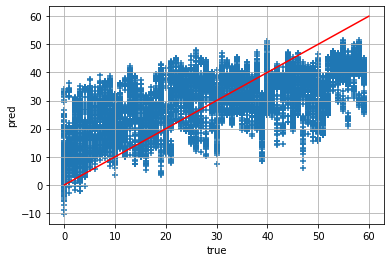

In [36]:
plt.scatter(y_test, y_pred, marker='+')
plt.plot([0,60], [0,60], color='red')
plt.xlabel('true')
plt.ylabel('pred')
plt.grid()

# Multinomial Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [21]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.69      0.56       111
           1       0.54      0.55      0.55       114
           2       0.46      0.77      0.57        94
           3       0.60      0.39      0.47       105
           4       0.65      0.42      0.51       102
           5       0.47      0.25      0.33       102
           6       0.38      0.35      0.36       103
           7       0.49      0.59      0.54       101
           8       0.36      0.67      0.47        87
           9       0.37      0.37      0.37       104
          10       0.65      0.71      0.68       105
          11       0.73      0.58      0.65       106
          12       0.73      0.42      0.54       116
          13       0.42      0.64      0.51        97
          14       0.57      0.69      0.63       114
          15       0.76      0.28      0.41       111
          16       0.50      0.28      0.36       127
          17       0.46    

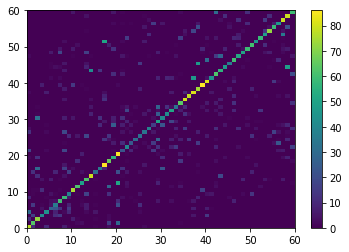

In [22]:
plt.pcolor(confusion_matrix(y_test, y_pred))
plt.colorbar();

In [23]:
matthews_corrcoef(y_test, y_pred)

0.5012145519270252

# LinearSVC

In [24]:
from sklearn.svm import LinearSVC

In [25]:
lsvc = LinearSVC().fit(X_train, y_train)


In [26]:
y_pred = lsvc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       111
           1       0.81      0.81      0.81       114
           2       0.71      0.80      0.75        94
           3       0.54      0.70      0.61       105
           4       0.74      0.70      0.72       102
           5       0.53      0.32      0.40       102
           6       0.43      0.31      0.36       103
           7       0.69      0.72      0.71       101
           8       0.56      0.62      0.59        87
           9       0.51      0.41      0.46       104
          10       0.73      0.66      0.69       105
          11       0.64      0.64      0.64       106
          12       0.60      0.74      0.66       116
          13       0.52      0.46      0.49        97
          14       0.73      0.70      0.71       114
          15       0.63      0.58      0.60       111
          16       0.61      0.80      0.69       127
          17       0.55    

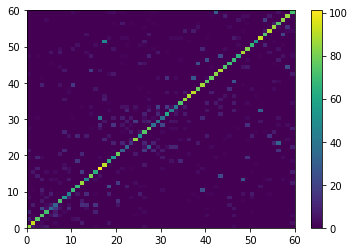

In [27]:
plt.pcolor(confusion_matrix(y_test, y_pred))
plt.colorbar();

In [28]:
matthews_corrcoef(y_test, y_pred)

0.6336398459858059

In [33]:
X_train.to_csv('X_train_index_13122022.csv')

# SVC

In [46]:
from sklearn.svm import SVC

In [47]:
svc = SVC().fit(X_train, y_train)

In [48]:
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       111
           1       0.98      0.94      0.96       114
           2       0.93      0.87      0.90        94
           3       0.87      0.92      0.90       105
           4       0.75      0.95      0.84       102
           5       0.83      0.78      0.81       102
           6       0.81      0.73      0.77       103
           7       0.98      0.85      0.91       101
           8       0.95      0.91      0.93        87
           9       0.84      0.65      0.74       104
          10       0.79      0.95      0.86       105
          11       0.89      0.89      0.89       106
          12       0.63      0.91      0.75       116
          13       0.76      0.75      0.76        97
          14       0.88      0.78      0.83       114
          15       0.79      0.71      0.75       111
          16       0.84      0.88      0.86       127
          17       0.72    

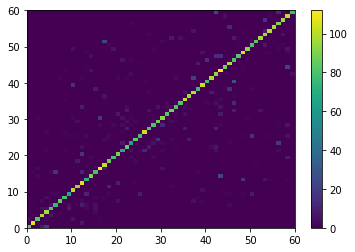

In [49]:
plt.pcolor(confusion_matrix(y_test, y_pred))
plt.colorbar();

In [50]:
matthews_corrcoef(y_test, y_pred)

0.8280878398184406

### Teste com tensões

Em outro notebook, geramos um corpus de acordes com tensões, além das notas do acorde propriamente ditas. Vamos ver se, treinando o classificador com acordes sem tensões, fazemos com que o modelo consiga classificar dados corretamente apesar da presença delas. 

In [37]:
data_tensao = pd.read_csv('../corpus/generated_chords/chromas_tensoes.csv')
data_tensao.set_index('Unnamed: 0', inplace=True)
data_tensao['true_fixed'] = data_tensao['true']
data_tensao.head()

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,true,true_fixed
Unnamed: 0,,,,,,,,,,,,,,
Gb7_pictures_at_an_exhibition_Piano_13.wav,552.153137,1689.765625,446.203491,562.950012,1282.802856,3202.918213,10308.510742,1674.340698,922.709778,2399.458252,14378.589844,2285.448975,Gb7,Gb7
Bb7_agsag-samai_Piano_11.wav,266.480713,378.829468,1631.775879,549.327332,842.041748,3272.126221,698.635925,238.173843,830.453674,2722.311279,9384.917969,1371.042603,Bb7,Bb7
A7_agogo-samba_Piano_b13_9.wav,839.243469,2787.674561,1010.211609,1757.030762,6546.571777,2650.958984,1145.361450,2822.628906,4412.368652,12377.827148,2084.681152,1289.559082,A7,A7
B7_al-saghil-al-sani_Piano_b9.wav,1821.143433,345.404327,610.283569,3164.448486,649.512634,338.133484,1811.965698,730.116272,330.597870,885.867371,2037.572754,9449.733398,B7,B7
Bb7_Nawakhat_Piano_#11.wav,229.049423,306.094177,1291.215454,403.677338,840.304871,2913.999268,627.592468,200.483154,727.502441,2292.122314,7876.994629,1175.617310,Bb7,Bb7


In [40]:
df_tensoes = data_tensao.reset_index().merge(df_chords_codes.reset_index(), 
                      left_on='true_fixed', 
                      right_on='index')

df_tensoes.set_index('Unnamed: 0', inplace=True)

df_tensoes.head()

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,true,true_fixed,index,distance,target
Unnamed: 0,,,,,,,,,,,,,,,,,
Gb7_pictures_at_an_exhibition_Piano_13.wav,552.153137,1689.765625,446.203491,562.950012,1282.802856,3202.918213,10308.510742,1674.340698,922.709778,2399.458252,14378.589844,2285.448975,Gb7,Gb7,Gb7,2.44949,44
Gb7_samba_Piano_b9_11.wav,826.936096,2398.468506,643.617737,571.974182,1999.412598,4497.979004,14793.565430,3218.593750,1551.496582,3432.256592,20435.599609,3493.364502,Gb7,Gb7,Gb7,2.44949,44
Gb7_mpre_Piano_9_b13.wav,696.494141,2194.722656,940.257568,667.810608,1773.729004,3598.986084,11229.749023,2292.393066,4765.924316,3566.387695,16938.814453,2696.218018,Gb7,Gb7,Gb7,2.44949,44
Gb7_bendir_Piano_13_#11.wav,1442.206665,1535.813843,420.262695,700.339905,1453.188110,2591.400391,7891.075684,1397.147949,830.223206,1842.399292,10753.217773,1890.328979,Gb7,Gb7,Gb7,2.44949,44
Gb7_spanish_tango_Piano_11.wav,502.195709,1371.399048,341.978851,299.403778,1180.286011,2563.924072,7898.880859,1282.423706,780.715149,2156.222168,12757.760742,2200.709717,Gb7,Gb7,Gb7,2.44949,44


In [41]:
# normalizando cada coluna
# dividindo pelo valor máximo de cada chroma
for note in notes:
    df_tensoes[note + '_norm'] = df_tensoes[note]/df_tensoes[notes].max(axis=1)
    
df_tensoes

,C,Db,D,Eb,E,F,Gb,G,Ab,A,...,D_norm,Eb_norm,E_norm,F_norm,Gb_norm,G_norm,Ab_norm,A_norm,Bb_norm,B_norm
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Gb7_pictures_at_an_exhibition_Piano_13.wav,552.153137,1689.765625,446.203491,562.950012,1282.802856,3202.918213,10308.510742,1674.340698,922.709778,2399.458252,...,0.031032,0.039152,0.089216,0.222756,0.716935,0.116447,0.064172,0.166877,1.000000,0.158948
Gb7_samba_Piano_b9_11.wav,826.936096,2398.468506,643.617737,571.974182,1999.412598,4497.979004,14793.565430,3218.593750,1551.496582,3432.256592,...,0.031495,0.027989,0.097840,0.220105,0.723911,0.157499,0.075921,0.167955,1.000000,0.170945
Gb7_mpre_Piano_9_b13.wav,696.494141,2194.722656,940.257568,667.810608,1773.729004,3598.986084,11229.749023,2292.393066,4765.924316,3566.387695,...,0.055509,0.039425,0.104714,0.212470,0.662960,0.135334,0.281361,0.210545,1.000000,0.159174
Gb7_bendir_Piano_13_#11.wav,1442.206665,1535.813843,420.262695,700.339905,1453.188110,2591.400391,7891.075684,1397.147949,830.223206,1842.399292,...,0.039083,0.065128,0.135140,0.240988,0.733834,0.129928,0.077207,0.171335,1.000000,0.175792
Gb7_spanish_tango_Piano_11.wav,502.195709,1371.399048,341.978851,299.403778,1180.286011,2563.924072,7898.880859,1282.423706,780.715149,2156.222168,...,0.026806,0.023468,0.092515,0.200970,0.619143,0.100521,0.061195,0.169013,1.000000,0.172500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gmaj7_venda_Piano_11.wav,807.462708,1019.609924,3741.227539,755.223389,245.979248,493.127289,2858.137939,8237.497070,1295.998779,519.311646,...,0.454170,0.091681,0.029861,0.059864,0.346967,1.000000,0.157329,0.063042,0.060115,0.203820
Gmaj7_bendir_Piano_b9_b13.wav,482.733673,945.367432,3607.547119,1087.744507,305.740265,555.209656,3120.308594,8042.447266,4061.037842,1002.317078,...,0.448563,0.135250,0.038016,0.069035,0.387980,1.000000,0.504951,0.124628,0.071564,0.189365
Gmaj7_mpre_Piano_11_13.wav,1502.353027,1465.178223,5240.661621,1111.792358,841.742737,829.963562,4293.035156,10597.132812,1726.900024,847.427673,...,0.494536,0.104914,0.079431,0.078320,0.405113,1.000000,0.162959,0.079968,0.073106,0.220691


In [43]:
X_tensoes = df_tensoes[list(map(lambda x:x+'_norm', notes))]
y_tensoes = df_tensoes['target']

In [44]:
X_tensoes

,C_norm,Db_norm,D_norm,Eb_norm,E_norm,F_norm,Gb_norm,G_norm,Ab_norm,A_norm,Bb_norm,B_norm
Unnamed: 0,,,,,,,,,,,,
Gb7_pictures_at_an_exhibition_Piano_13.wav,0.038401,0.117520,0.031032,0.039152,0.089216,0.222756,0.716935,0.116447,0.064172,0.166877,1.000000,0.158948
Gb7_samba_Piano_b9_11.wav,0.040465,0.117367,0.031495,0.027989,0.097840,0.220105,0.723911,0.157499,0.075921,0.167955,1.000000,0.170945
Gb7_mpre_Piano_9_b13.wav,0.041118,0.129568,0.055509,0.039425,0.104714,0.212470,0.662960,0.135334,0.281361,0.210545,1.000000,0.159174
Gb7_bendir_Piano_13_#11.wav,0.134119,0.142824,0.039083,0.065128,0.135140,0.240988,0.733834,0.129928,0.077207,0.171335,1.000000,0.175792
Gb7_spanish_tango_Piano_11.wav,0.039364,0.107495,0.026806,0.023468,0.092515,0.200970,0.619143,0.100521,0.061195,0.169013,1.000000,0.172500
...,...,...,...,...,...,...,...,...,...,...,...,...
Gmaj7_venda_Piano_11.wav,0.098023,0.123777,0.454170,0.091681,0.029861,0.059864,0.346967,1.000000,0.157329,0.063042,0.060115,0.203820
Gmaj7_bendir_Piano_b9_b13.wav,0.060023,0.117547,0.448563,0.135250,0.038016,0.069035,0.387980,1.000000,0.504951,0.124628,0.071564,0.189365
Gmaj7_mpre_Piano_11_13.wav,0.141770,0.138262,0.494536,0.104914,0.079431,0.078320,0.405113,1.000000,0.162959,0.079968,0.073106,0.220691


In [51]:
y_tensoes_pred = svc.predict(X_tensoes)
print(classification_report(y_tensoes, y_tensoes_pred))

              precision    recall  f1-score   support

           0       0.67      0.59      0.62        17
           1       0.29      0.12      0.17        17
           2       0.71      0.88      0.79        17
           3       0.00      0.00      0.00         0
           4       1.00      0.88      0.94        17
           7       0.93      0.76      0.84        17
           8       0.76      0.94      0.84        17
          10       0.94      1.00      0.97        17
          11       0.89      0.47      0.62        17
          12       0.65      0.88      0.75        17
          13       0.00      0.00      0.00         0
          14       1.00      1.00      1.00        17
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.77      1.00      0.87        17
          18       0.63      0.71      0.67        17
          20       0.67      0.47      0.55        17
          21       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
matthews_corrcoef(y_tensoes, y_tensoes_pred)

0.6511262982567201

In [53]:
df_chords_codes

,distance,target
Cmaj7,0.000000,0
Emin7,1.414214,1
Amin7,1.414214,2
Dbmeio_dim,1.414214,3
C7,1.414214,4
Dbdim,2.000000,5
Edim,2.000000,6
Dbmin7,2.000000,7
Cmin7,2.000000,8
Gdim,2.000000,9


### Variando o target

Até agora, os classificadores categóricos que testamos têm o Cmaj7 codificado como 0 e a codificação de todos os outros acordes parte dele. Vamos experimentar alterar isso e avaliar a performance.

In [41]:
import itertools

In [100]:
# definindo este dicionário com apenas 5 acordes pra testar. no código definitivo não vou usar
perfect_chromas_5 = dict(itertools.islice(perfect_chromas.items(), 5))
perfect_chromas_5

for acorde, vetor in perfect_chromas.items():
    print(acorde)
    vec_acorde = np.array(vetor)
    
    
    dists = {}
    for key, value in perfect_chromas.items():
        value = np.array(value)
        dist = np.linalg.norm(value - vec_acorde)
        print('Acorde:', key, '|', 'Distância:', dist)
        dists[key] = dist
        print('--------------------------------')
        
    df_chords_codes = pd.DataFrame(data=dists.values(), 
                                   index=dists.keys()).sort_values(0, 
                                                                   ascending=True)

    df_chords_codes.rename(columns={0:'distance'}, 
                           inplace=True)

    df_chords_codes['target_{}'.format(acorde)] = list(range(len(df_chords_codes)))
    
    df_model = df_model.reset_index().merge(df_chords_codes.reset_index(), 
                                            left_on='true_fixed', 
                                            right_on='index')

    df_model.set_index('Unnamed: 0', 
                       inplace=True)
#     df_chords_codes

Cmaj7
Acorde: Cmaj7 | Distância: 0.0
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.0
--------------------------------
Acorde: Fmaj7 | Distância: 2.0
--------------------------------
Acorde: Gbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Gmaj7 | Distância: 2.0
--------------------------------
Acorde: Abmaj7 | Distância: 2.0
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Db7 | Distância: 2.449489742783178
-

Emaj7
Acorde: Cmaj7 | Distância: 2.0
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 0.0
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.0
--------------------------------
Acorde: Amaj7 | Distância: 2.0
--------------------------------
Acorde: Bbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Bmaj7 | Distância: 2.0
--------------------------------
Acorde: C7 | Distância: 2.449489742783178
--------------------------------
Acorde: Db7 | Distância: 2.0
----------------

Gmaj7
Acorde: Cmaj7 | Distância: 2.0
--------------------------------
Acorde: Dbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Dmaj7 | Distância: 2.0
--------------------------------
Acorde: Ebmaj7 | Distância: 2.0
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 0.0
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.0
--------------------------------
Acorde: C7 | Distância: 2.449489742783178
--------------------------------
Acorde: Db7 | Distância: 2.449489742783178
--

--------------------------------
Acorde: Gmeio_dim | Distância: 2.449489742783178
--------------------------------
Acorde: Abmeio_dim | Distância: 2.449489742783178
--------------------------------
Acorde: Ameio_dim | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmeio_dim | Distância: 1.4142135623730951
--------------------------------
Acorde: Bmeio_dim | Distância: 2.449489742783178
--------------------------------
Bbmaj7
Acorde: Cmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.0
--------------------------------
Acorde: Ebmaj7 | Distância: 2.0
--------------------------------
Acorde: Emaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Fmaj7 | Distância: 2.0
--------------------------------
Acorde: Gbmaj7 | Distância: 2.0
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
-------

Db7
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Emaj7 | Distância: 2.0
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.0
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.0
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Db7 | Distâ

Eb7
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Gbmaj7 | Distância: 2.0
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.0
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.0
--------------------------------
Acorde: C7 | Distância: 2.0
--------------------------------
Acorde: Db7 | Distância: 2.4494897

F7
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.0
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Abmaj7 | Distância: 2.0
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.0
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 2.449489742783178
--------------------------------
Acorde: Db7 | Distânc

Acorde: D7 | Distância: 2.449489742783178
--------------------------------
Acorde: Eb7 | Distância: 2.449489742783178
--------------------------------
Acorde: E7 | Distância: 2.0
--------------------------------
Acorde: F7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gb7 | Distância: 2.8284271247461903
--------------------------------
Acorde: G7 | Distância: 0.0
--------------------------------
Acorde: Ab7 | Distância: 2.8284271247461903
--------------------------------
Acorde: A7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bb7 | Distância: 2.0
--------------------------------
Acorde: B7 | Distância: 2.449489742783178
--------------------------------
Acorde: Cmin7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmin7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmin7 | Distância: 2.0
--------------------------------
Acorde: Ebmin7 | Distância: 2.8284271247461903
------------------

Bb7
Acorde: Cmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Dbmaj7 | Distância: 2.0
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.0
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.0
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 2.449489742783178
--------------------------------
Acorde: Db7 | Distân

Cmin7
Acorde: Cmaj7 | Distância: 2.0
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Ebmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Amaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.0
--------------------------------
Acorde: C7 | Distância: 1.4142135623730951
--------------------------------
A

Dmin7
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.0
--------------------------------
Acorde: Dmaj7 | Distância: 2.0
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Fmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Bmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: C7 | Distância: 2.449489742783178
--------------------------------
Ac

Emin7
Acorde: Cmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Dbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.0
--------------------------------
Acorde: Emaj7 | Distância: 2.0
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Gmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 2.0
--------------------------------
Acorde: Db7 | Di

Gbmin7
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Ebmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.0
--------------------------------
Acorde: Gbmaj7 | Distância: 2.0
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Amaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 2.449489742783178
--------------------------------
A

Abmin7
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Fmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 2.0
--------------------------------
Acorde: Abmaj7 | Distância: 2.0
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Bmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: C7 | Distância: 2.8284271247461903
--------------------------------


Bbmin7
Acorde: Cmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Dbmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Gmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.0
--------------------------------
Acorde: Bbmaj7 | Distância: 2.0
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 2.449489742783178
--------------------------------
A

Cdim
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.0
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.0
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.0
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.0
--------------------------------
Acorde: C7 | Distância: 2.449489742783178
--------------------------------
Acorde: Db7 | Distância: 2.82842712

Ddim
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.0
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.0
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 2.0
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.0
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Db7 | Distância: 1.4142135

Edim
Acorde: Cmaj7 | Distância: 2.0
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.0
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.0
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.0
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Db7 | Distância: 2.4494897

Gbdim
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.0
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.0
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.0
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.0
--------------------------------
Acorde: C7 | Distância: 2.449489742783178
--------------------------------
Acorde: Db7 | Distância: 2.8284271

Abdim
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.0
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.0
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 2.0
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.0
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Db7 | Distância: 1.414213

Bbdim
Acorde: Cmaj7 | Distância: 2.0
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.0
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.0
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.0
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Db7 | Distância: 2.449489

Cmeio_dim
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.0
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.0
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.0
--------------------------------
Acorde: Amaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: C7 | Distância: 2.0
--------------------------------
Acorde: Db7 | Distância: 2.8

Dmeio_dim
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.0
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.0
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.0
--------------------------------
Acorde: Bmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: C7 | Distância: 2.449489742783178
--------------------------------
Acorde: Db7 | 

Emeio_dim
Acorde: Cmaj7 | Distância: 2.0
--------------------------------
Acorde: Dbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 2.0
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.0
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Db7 |

Gbmeio_dim
Acorde: Cmaj7 | Distância: 2.0
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.0
--------------------------------
Acorde: Ebmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.0
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 2.0
--------------------------------
Acorde: Db7 | Distância: 2.

Abmeio_dim
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.0
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.0
--------------------------------
Acorde: Fmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.0
--------------------------------
Acorde: C7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Db7 

Bbmeio_dim
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.0
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.0
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.0
--------------------------------
Acorde: Gmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 2.0
--------------------------------
Acorde: Db7 | Distância: 2.

In [102]:
df_model

,C,Db,D,Eb,E,F,Gb,G,Ab,A,...,target_Abmeio_dim,index_x,distance_x,target_Ameio_dim,index_y,distance_y,target_Bbmeio_dim,index,distance,target_Bmeio_dim
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,...,31,Adim,1.414214,7,Adim,2.828427,52,Adim,2.44949,29
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,...,31,Adim,1.414214,7,Adim,2.828427,52,Adim,2.44949,29
Adim_ngbaka-maibo_Flute.ogg,68037.242188,12835.152344,4870.505371,40230.593750,39330.230469,17371.283203,75865.453125,33637.277344,22151.335938,148937.390625,...,31,Adim,1.414214,7,Adim,2.828427,52,Adim,2.44949,29
Adim_york-samai_Flute.ogg,22348.162109,3972.228760,2144.426758,17316.121094,7306.083496,7339.908691,43593.343750,13212.253906,4215.419434,27228.595703,...,31,Adim,1.414214,7,Adim,2.828427,52,Adim,2.44949,29
Adim_mpre_Flute.ogg,45878.093750,8526.463867,3851.276611,31584.609375,23283.982422,11233.979492,53161.980469,22626.351562,13100.133789,89041.476562,...,31,Adim,1.414214,7,Adim,2.828427,52,Adim,2.44949,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Emaj7_outside_now_Mandolin.ogg,10574.058594,1926.091675,3433.316162,56737.890625,212276.109375,22103.914062,3112.023438,11845.454102,49821.421875,7870.000000,...,13,Emaj7,2.449490,46,Emaj7,2.000000,18,Emaj7,2.44949,38
Emaj7_aksak_Mandolin.ogg,10376.426758,1492.088745,3527.731445,51728.863281,170200.609375,17468.171875,2854.901367,9171.428711,42606.144531,7182.869629,...,13,Emaj7,2.449490,46,Emaj7,2.000000,18,Emaj7,2.44949,38
Emaj7_york-samai_Mandolin.ogg,8939.829102,946.150879,3648.095459,44141.421875,112385.398438,11260.331055,2627.489502,10729.942383,48903.035156,7757.161621,...,13,Emaj7,2.449490,46,Emaj7,2.000000,18,Emaj7,2.44949,38


In [101]:
# df_model[['target_Cmaj7', 'target_Ebmaj7']]

In [104]:
df_perform_model = pd.DataFrame()

In [106]:
df_perform_model.at['Cmaj7', 'matthews_corrcoef'] = 0.82
df_perform_model

,matthews_corrcoef
Cmaj7,0.82


In [107]:
ids_X_train = X_train.index
ids_X_test = X_test.index

df_perform_model = pd.DataFrame()

for acorde, vetor in perfect_chromas.items():
    
    y_train_new = df_model.loc[ids_X_train]['target_{}'.format(acorde)]
    y_test_new = df_model.loc[ids_X_test]['target_{}'.format(acorde)]
    
    svc = SVC().fit(X_train, y_train_new)

    y_pred = svc.predict(X_test)
    
    df_perform_model.at[acorde, 'matthews_corrcoef'] = matthews_corrcoef(y_test_new, y_pred)
    
    print(acorde, matthews_corrcoef(y_test_new, y_pred))

Cmaj7 0.8223483676962571
Dbmaj7 0.8209051381198174
Dmaj7 0.8218516622505115
Ebmaj7 0.8222063597105521
Emaj7 0.8233061568619084
Fmaj7 0.8214130441959439
Gbmaj7 0.8207491476563373
Gmaj7 0.8226680799706196
Abmaj7 0.822328401205951
Amaj7 0.8207479721549895
Bbmaj7 0.8220515889641024
Bmaj7 0.8218535711714575
C7 0.8210593832809612
Db7 0.8218608777244502
D7 0.8223666507710458
Eb7 0.8205866003003464
E7 0.8231497034881693
F7 0.8220515829426874
Gb7 0.8210618594964714
G7 0.8233028633763206
Ab7 0.8226843845907224
A7 0.8201109380297454
Bb7 0.8218969759530222
B7 0.8231440553676795
Cmin7 0.8215723553304695
Dbmin7 0.8207494553875914
Dmin7 0.8217361893354708
Ebmin7 0.8209040884325087
Emin7 0.822987296497991
Fmin7 0.8231481484133708
Gbmin7 0.8209016654189724
Gmin7 0.8215733459723932
Abmin7 0.822988336746898
Amin7 0.8220321473516851
Bbmin7 0.8209095773324193
Bmin7 0.8234598722243073
Cdim 0.8222055409670009
Dbdim 0.8204284234236575
Ddim 0.8231525066591454
Ebdim 0.8222055409670009
Edim 0.8204284234236575
Fd

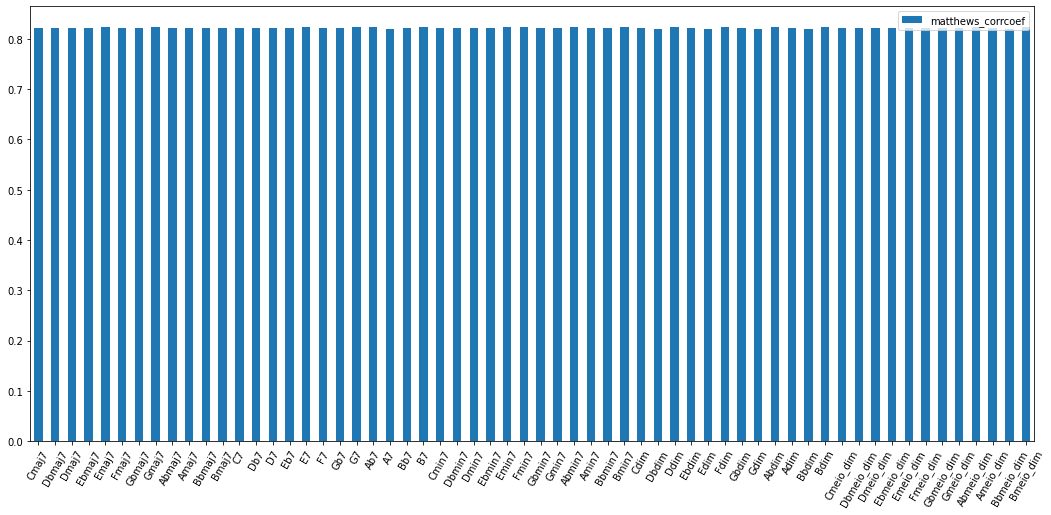

In [118]:
df_perform_model.plot(kind='bar', figsize=(18,8))
plt.xticks(rotation=60);

In [ ]:
midi = 